# Анализ заказов тако (2024-2025).

Этот проект - EDA о заказах тако в различных ресторанах и городах США. Цель - изучить распределение заказов по времени доставки, цене и другим характеристикам.

**Данные**: Датасет `taco_sales_(2024-2025).csv` включает в себя информацию о заказах тако, включая размер, тип тако, время доставки, цену и чаевые.

**Инструменты**: Python, pandas, matplotlib, seaborn

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('taco_sales_(2024-2025).csv')

# Preview
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [3]:
# info
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [7]:
df.describe()

,Order ID,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,552504.865000,50.93000,2.529000,13.073420,6.908250,1.806110
std,255948.779709,23.22754,1.717005,7.142268,2.310137,1.132035
min,101139.000000,10.00000,0.000000,0.510000,3.000000,0.010000
25%,331796.750000,30.00000,1.000000,6.972500,4.500000,0.907500
50%,559740.000000,53.00000,3.000000,13.200000,6.750000,1.760000
75%,771781.750000,71.00000,4.000000,19.242500,9.250000,2.520000
max,999138.000000,90.00000,5.000000,24.980000,10.750000,4.980000


Проверяем, есть ли аномальные данные

In [112]:
print(df[df['Price ($)'] < 0])
print(df[df['Tip ($)'] < 0])

Empty DataFrame
Columns: [Order ID, Restaurant Name, Location, Order Time, Delivery Time, Delivery Duration (min), Taco Size, Taco Type, Toppings Count, Distance (km), Price ($), Tip ($), Weekend Order, Delivery Hour, Order Hour]
Index: []
Empty DataFrame
Columns: [Order ID, Restaurant Name, Location, Order Time, Delivery Time, Delivery Duration (min), Taco Size, Taco Type, Toppings Count, Distance (km), Price ($), Tip ($), Weekend Order, Delivery Hour, Order Hour]
Index: []


In [41]:
df.groupby('Location')['Restaurant Name'].value_counts()

Location  Restaurant Name  
Austin    Taco Fiesta          16
          Taco Haven           12
          The Taco Stand       11
          Spicy Taco House      9
          Taco Time Express     9
                               ..
San Jose  Taco Time Express     9
          Spicy Taco House      8
          Casa del Taco         7
          El Taco Loco          7
          Grande Tacos          6
Name: count, Length: 100, dtype: int64

In [80]:
df['Taco Type'].value_counts()

Taco Type
Chicken Taco    218
Fish Taco       211
Veggie Taco     197
Pork Taco       192
Beef Taco       182
Name: count, dtype: int64

**Промежуточный вывод**: люди чаще всего заказывают тако с курицей. На втором месте идёт тако с рыбой.

Text(0.5, 1.0, 'Delivery Duration Distribution')

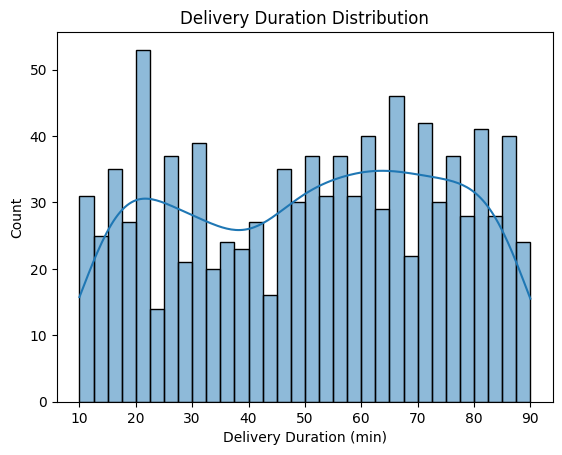

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Delivery Duration (min)'], bins=32, kde=True)
plt.title('Delivery Duration distribution')

Из графика видно, что чаще всего заказы доставляют за ~20 минут.

Text(0.5, 1.0, 'Price Distribution')

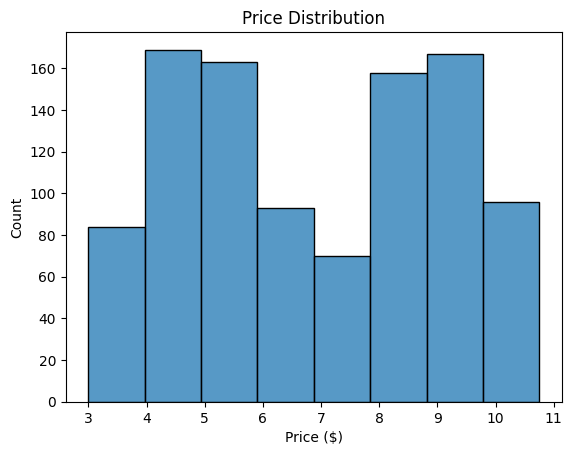

In [87]:
sns.histplot(df['Price ($)'], bins=8)
plt.title('Price distribution')

Text(0.5, 1.0, 'Price dependence on taco size')

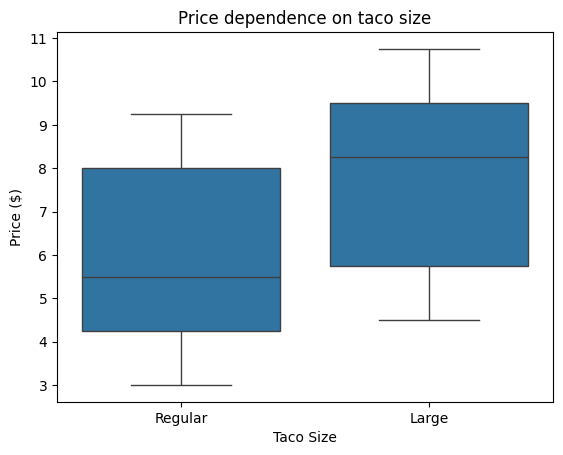

In [90]:
sns.boxplot(x='Taco Size', y='Price ($)', data=df)
plt.title('Price dependence on taco size')

Text(0.5, 1.0, 'Tip to price ratio')

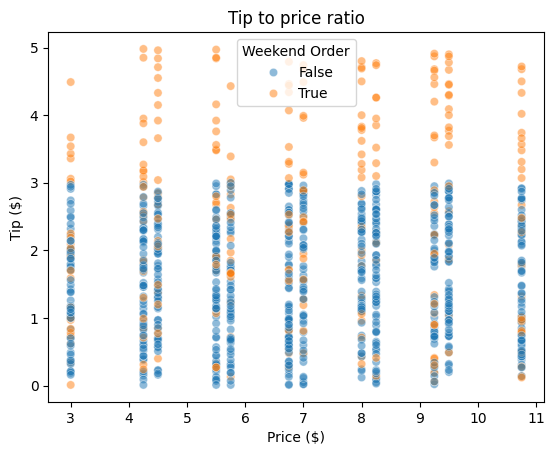

In [45]:
sns.scatterplot(x=df['Price ($)'], y=df['Tip ($)'], hue=df['Weekend Order'], alpha=0.5)
plt.title('Tip to price ratio')

In [23]:
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'], format='%d-%m-%Y %H:%M')
df['Order Time'] = pd.to_datetime(df['Order Time'], format='%d-%m-%Y %H:%M')

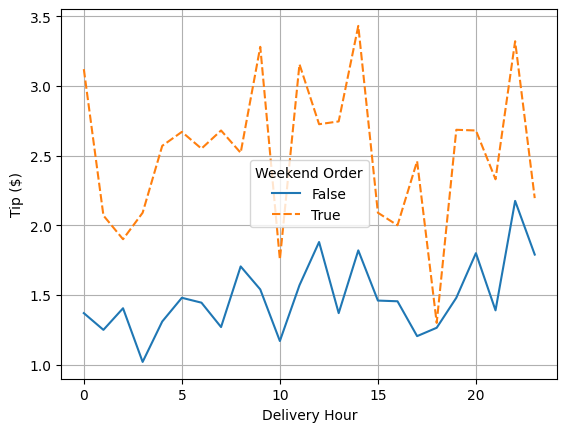

In [37]:
df['Delivery Hour'] = df['Delivery Time'].dt.hour
df['Order Hour'] = df['Order Time'].dt.hour

sns.lineplot(x='Delivery Hour', 
             y='Tip ($)', 
             data=df, 
             hue='Weekend Order', 
             style='Weekend Order',
             estimator='median',
             errorbar=None)

plt.grid()

plt.title('')

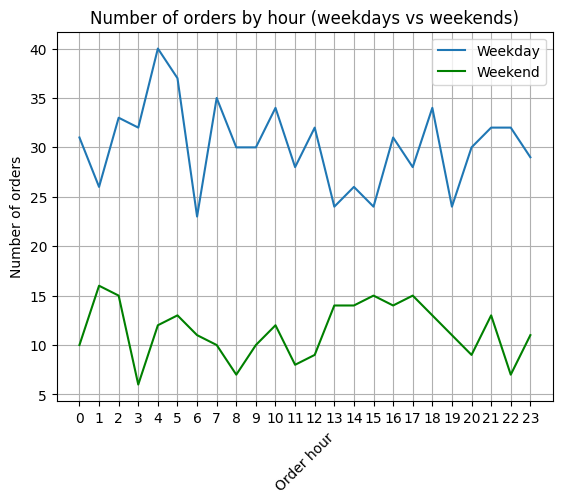

In [138]:
orders_by_hour_weekday = df[~df['Weekend Order']]['Order Hour'].value_counts().sort_index()
orders_by_hour_weekend = df[df['Weekend Order']]['Order Hour'].value_counts().sort_index()

sns.lineplot(x=orders_by_hour_weekday.index, 
             y=orders_by_hour_weekday.values,
             label='Weekday')

sns.lineplot(x=orders_by_hour_weekend.index,
             y=orders_by_hour_weekend.values,
             label='Weekend', color='green')

plt.title('Number of orders by hour (weekdays vs weekends)')
plt.ylabel('Number of orders')
plt.xlabel('Order hour', rotation=45)
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()

plt.show()

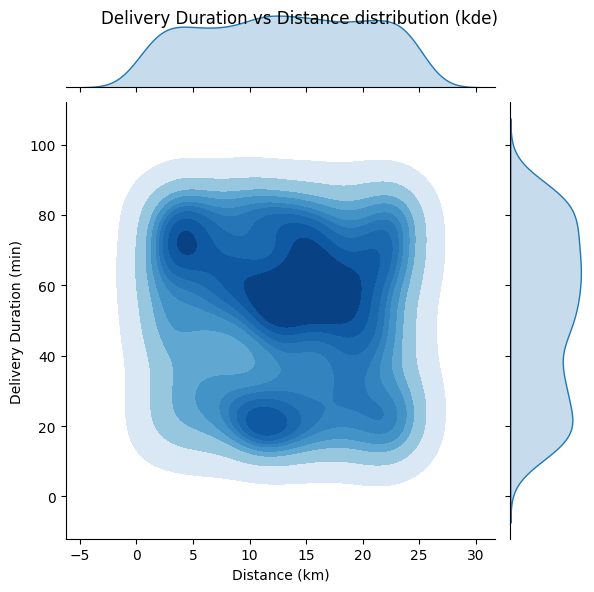

In [139]:
sns.jointplot(y='Delivery Duration (min)', 
             x='Distance (km)', 
             data=df,
             kind='kde',
             fill=True,
             cmap='Blues')
plt.suptitle('Delivery Duration vs Distance distribution (kde)')

plt.show()

<Axes: xlabel='Restaurant Name'>

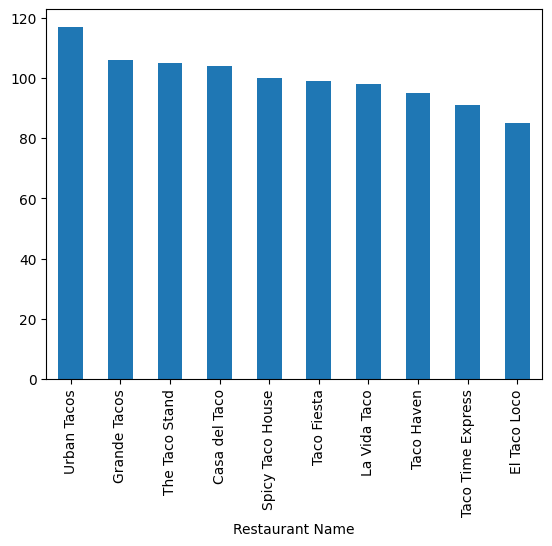

In [91]:
df['Restaurant Name'].value_counts().head(10).plot.bar()

<Axes: ylabel='count'>

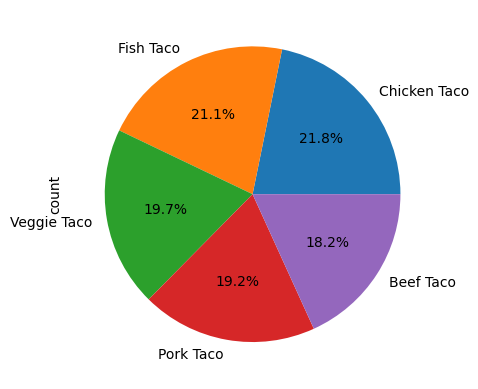

In [96]:
df['Taco Type'].value_counts().plot.pie(autopct='%1.1f%%')

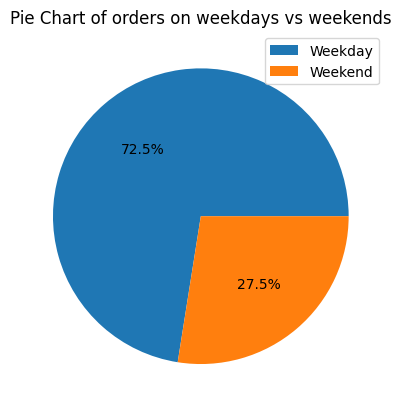

In [154]:
df['Weekend Order'].value_counts().plot.pie(labels=None, autopct='%1.1f%%').set_ylabel('')
plt.legend(['Weekday', 'Weekend'])
plt.title('Pie Chart of orders on weekdays vs weekends')

plt.show()

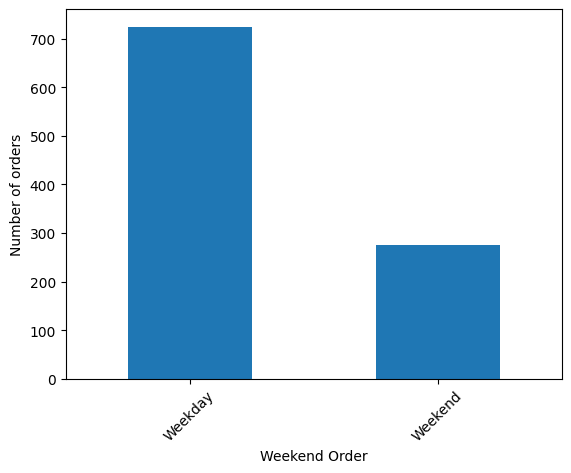

In [156]:
df['Weekend Order'].value_counts().plot.bar()
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=45)
plt.ylabel('Number of orders')
plt.show()

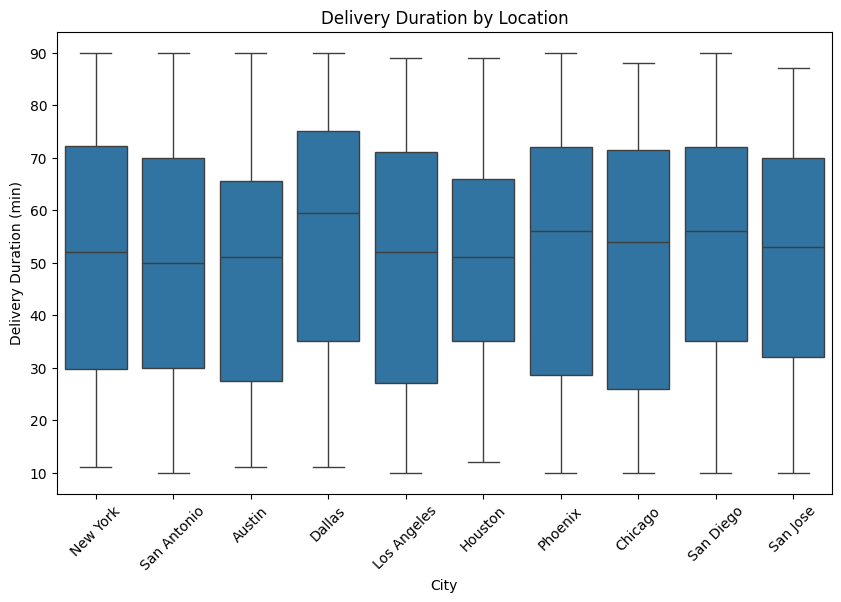

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Delivery Duration (min)', data=df)
plt.title('Delivery Duration by Location')
plt.xlabel('City')
plt.ylabel('Delivery Duration (min)')
plt.xticks(rotation=45)
plt.show()

## Выводы
- Самый популярный тип тако - Chicken taco (21.8%)
- Среднее время доставки варьируется по городам. Например, медианное время доставки в Далласе выше, чем у всех остальных городов. Это может быть связано с логистикой или расстоянием.
- Заказы в выходные приносят больше чаевых, нежели по будним дням.
- Большая часть заказов делается утром и вечером (в будние дни), что может говорить о том, что люди берут тако на завтрак или ужин.
- Заказы в выходные дни составляют около 27.5% от общего числа. Это говорит о стабильном спросе в разные дни недели.
- Рекомендации: следует сосредоточиться на поплуярных позициях тако, также стоит ускорить время доставки путем анализа логистики в городах с длительным временем доставки